# Ensembles classifiers using trees on the iris dataset

In this notebook we apply several ensemble methods to the Iris dataset using tree classifiers and plot the resulting decision surfaces. Note that this notebook has been created using the material from http://scikit-learn.org/stable/modules/ensemble.html

First we load all the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier,BaggingClassifier)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

Next we define some of the parameters required to run the experiments like the number of estimators used in each ensembles and the random seed to be able to reproduce the results.

In [2]:
# Number of estimators used in each ensemble
n_estimators = 30

# set the random seed to be able to repeat the experiment
random_seed = 1234 

Load the dataset

In [3]:
iris = load_iris()

Set the models to be compared
- simple decision tree
- bagging
- random forest
- extra tree classifiers
- adaboost

In [4]:
models = {'Decision Tree':DecisionTreeClassifier(max_depth=None),
          'Bagging':BaggingClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators),
          'Random Forest':RandomForestClassifier(n_estimators=n_estimators),
          'Extremely Randomized Trees':ExtraTreesClassifier(n_estimators=n_estimators),
          'Ada Boost':AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)}

For each model, we apply 10-fold stratified crossvalidation and compute the average accuracy and the corresponding standard deviation

In [5]:
scores = {}
for pair in ([0, 1], [0, 2], [2, 3]):
    for model_name in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        clf = models[model_name];
        score = cross_val_score(clf,X,y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=random_seed))
        scores[(model_name,str(pair))]=(np.average(score),np.std(score))

Then, we print for every variable pair the performance of all the models

In [6]:
for pair in ([0, 1], [0, 2], [2, 3]):
    print('Iris - Variables: ',iris.feature_names[pair[0]],' & ',iris.feature_names[pair[1]])
    for model_name in models:
        print('\t%26s\t%.3f +/- %.3f'%(model_name,scores[(model_name,str(pair))][0],scores[(model_name,str(pair))][1]))
    print('\n')

('Iris - Variables: ', 'sepal length (cm)', ' & ', 'sepal width (cm)')
	                   Bagging	0.800 +/- 0.089
	Extremely Randomized Trees	0.720 +/- 0.093
	                 Ada Boost	0.753 +/- 0.079
	             Random Forest	0.720 +/- 0.115
	             Decision Tree	0.673 +/- 0.096


('Iris - Variables: ', 'sepal length (cm)', ' & ', 'petal length (cm)')
	                   Bagging	0.933 +/- 0.067
	Extremely Randomized Trees	0.953 +/- 0.043
	                 Ada Boost	0.940 +/- 0.036
	             Random Forest	0.927 +/- 0.047
	             Decision Tree	0.920 +/- 0.065


('Iris - Variables: ', 'petal length (cm)', ' & ', 'petal width (cm)')
	                   Bagging	0.967 +/- 0.045
	Extremely Randomized Trees	0.953 +/- 0.052
	                 Ada Boost	0.947 +/- 0.050
	             Random Forest	0.960 +/- 0.044
	             Decision Tree	0.947 +/- 0.050




Finally, we plot the decision surfaces for every model and every attribute combination.
- Decision tree classifier (first column)
- Bagging (second column)
- Random forest (third column)
- Extra-trees (fourth column)
- AdaBoost (fifth column)

('\nIris - Variables: ', 'sepal length (cm)', ' & ', 'sepal width (cm)')
	                   Bagging	0.827
	Extremely Randomized Trees	0.927
	                 Ada Boost	0.840
	             Random Forest	0.927
	             Decision Tree	0.927
('\nIris - Variables: ', 'sepal length (cm)', ' & ', 'petal length (cm)')
	                   Bagging	0.953
	Extremely Randomized Trees	0.993
	                 Ada Boost	0.993
	             Random Forest	0.993
	             Decision Tree	0.993
('\nIris - Variables: ', 'petal length (cm)', ' & ', 'petal width (cm)')
	                   Bagging	0.973
	Extremely Randomized Trees	0.993
	                 Ada Boost	0.993
	             Random Forest	0.993
	             Decision Tree	0.993


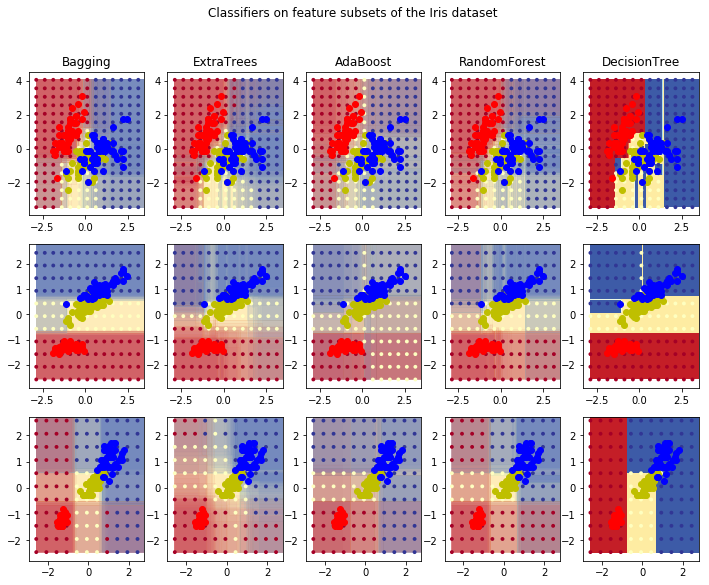

In [7]:
n_classes = 3
plot_colors = "ryb"
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses

plot_idx = 1

plt.figure(figsize=(12,9))
for pair in ([0, 1], [0, 2], [2, 3]):
    print('\nIris - Variables: ',iris.feature_names[pair[0]],' & ',iris.feature_names[pair[1]])


    for model_name in models:
        model = models[model_name]
        
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(random_seed)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        model_details = model_title
#         if hasattr(model, "estimators_"):
#             model_details += " with {} estimators".format(len(model.estimators_))
#         print( model_details + " with features", pair, "has a score of", scores )
        
        print('\t%26s\t%.3f'%(model_name,scores))



        plt.subplot(3, 5, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a black outline
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        for i, c in zip(xrange(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                        cmap=cmap)

        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset")
plt.axis("tight")

plt.show()

Increasing `max_depth` for AdaBoost lowers the standard deviation of the scores (but the average score does not improve).

See the console's output for further details about each model.

In this example you might try to:

- vary the ``max_depth`` for the ``DecisionTreeClassifier``, ``BaggingClassifier`` and
   ``AdaBoostClassifier``, perhaps try ``max_depth=3`` for the
   ``DecisionTreeClassifier`` or ``max_depth=None`` for ``AdaBoostClassifier``
   
- vary ``n_estimators``

It is worth noting that RandomForests and ExtraTrees can be fitted in parallel on many cores as each tree is built independently of the others. AdaBoost's samples are built sequentially and so do not use multiple cores.